<a href="https://colab.research.google.com/github/Ash100/PyMol/blob/main/Conversion_of_Ghostscript_files_into_PNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generated by **Dr. Ashfaq Ahmad** and is useful to convery the Ghostscript file to the high resolution PNG image.

In [ ]:
!pip install pillow matplotlib

In [ ]:
!apt-get install -y ghostscript

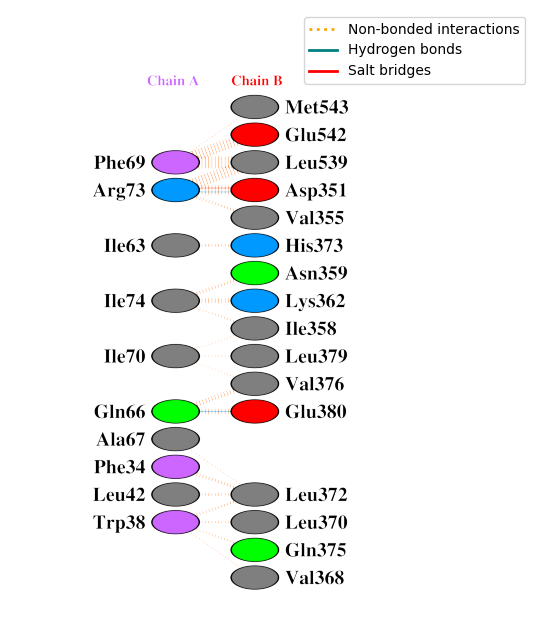

In [24]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import subprocess

# Function to convert PS/PDF to PNG using Ghostscript with 600 DPI resolution
def convert_to_png(input_file, output_file, dpi=600):
    command = [
        'gs',
        '-sDEVICE=pngalpha',
        f'-r{dpi}',  # Set the resolution in DPI
        '-o', output_file,
        input_file
    ]
    subprocess.run(command, check=True)

# Example: Convert a PostScript file to PNG
input_file = '/content/sample_data/RunDimhtml.ps'  # Replace with your Ghostscript file
output_file = 'AVpr_ARMutant.png'
convert_to_png(input_file, output_file)

# Open the image using Pillow
image = Image.open(output_file)

# Convert image to numpy array for Matplotlib
image_np = np.array(image)

# Plot the image using Matplotlib
fig, ax = plt.subplots(figsize=(10, 8))

# Display the image
ax.imshow(image_np)
ax.axis('off')  # Hide the axes

# Add legends on the side
legends = [
    {'label': 'Non-bonded interactions', 'color': 'orange', 'linestyle': ':'},
    {'label': 'Hydrogen bonds', 'color': 'teal', 'linestyle': '-'},
    {'label': 'Salt bridges', 'color': 'red', 'linestyle': '-'}
]

for idx, legend in enumerate(legends):
    ax.plot([], [], label=legend['label'], color=legend['color'], linestyle=legend['linestyle'], linewidth=2)

# Add the legend to the plot
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Save the final image with the legends
final_output_file = 'EVpr_VprMut.png'
plt.savefig(final_output_file, bbox_inches='tight', pad_inches=0.1, dpi=600)

# Display the final image in the notebook
final_image = Image.open(final_output_file)
final_image.show()